In [39]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import math
from scipy import stats
from sklearn.metrics import r2_score

In [51]:
regr = linear_model.LinearRegression()

In [2]:
pred = pd.read_csv("prediction_trials.tsv", sep="\t")

In [40]:
event = pd.read_csv("accidentsAndIncidents.csv")
eventsd=event.as_matrix()

In [42]:
event["2014"].min()

0

In [4]:
x_train=np.array([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]).reshape(-1, 1)

x_test=np.array([2014]).reshape(-1, 1)
x_train

array([[2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013]])

In [5]:
pred_roadwork=[]
re=[]

In [6]:
from sklearn.linear_model import Ridge

In [7]:

for i in range(len(pred)):
    y_train=np.array(event.loc[i,['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']])
    if(np.count_nonzero(y_train) > 5):
        clf = Ridge(alpha=15.0)
    else:
        clf = Ridge(alpha=30.0)
    clf.fit(x_train, y_train)
    y_test=np.array(event.loc[i,['2014']])
    y=clf.predict(x_test)
    if y<0:
        y=0
    re.append(y)
    pred.set_value(i, 'dS2014', y)
    pred_roadwork.append(((y - y_test) ** 2))
    

In [8]:
np.correlate(re, event['2014'], "full")

array([  932.82327273,   242.72976623,  1283.89620779, ...,   695.62285714,
          99.94935065,   298.03246753])

In [14]:
pred['dS2014'].head(100)

0     17.938909
1      3.977922
2     11.773091
3     34.321455
4     19.642857
5      0.000000
6     11.623377
7      0.000000
8     58.432000
9      2.874026
10     0.000000
11    11.323377
12     0.444156
13     0.000000
14     3.513455
15    12.133818
16     1.616883
17     0.749351
18    35.512987
19    17.640727
20     0.000000
21     4.202597
22    21.702545
23     5.814286
24    24.397818
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29    35.660364
        ...    
70    15.491636
71     0.000000
72     0.000000
73     0.000000
74    50.138909
75    10.884416
76     4.367273
77     2.018182
78     0.712000
79    24.954182
80     0.000000
81     0.000000
82    28.647273
83     2.371429
84     5.627636
85     0.000000
86    10.042909
87    11.735273
88     0.000000
89     0.000000
90     0.000000
91     0.000000
92    13.463273
93     0.000000
94    22.690182
95     0.000000
96     9.353247
97     0.000000
98     0.000000
99    18.835065
Name: dS2014, dtype: flo

0     15
1      4
2     16
3     47
4     26
5      0
6      7
7      0
8     92
9      3
10     0
11    16
12     2
13     0
14     3
15    22
16     1
17     1
18    44
19    28
20     0
21     1
22    35
23     5
24    36
25     0
26     0
27     0
28     0
29    29
      ..
70    11
71     0
72     0
73     0
74    51
75     5
76     8
77     0
78     1
79    27
80     0
81     0
82    53
83     1
84     6
85     0
86    26
87    30
88     0
89     0
90     0
91     0
92    15
93     0
94    34
95     0
96     2
97     0
98     0
99     6
Name: 2014, dtype: int64

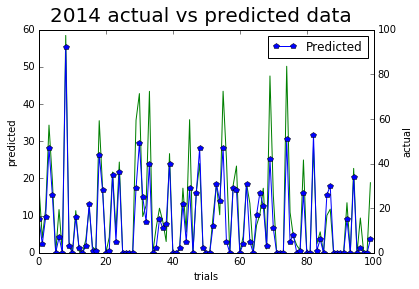

In [38]:
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x=range(100)
ax1.plot(x, pred['dS2014'].head(100), 'g-')
ax2.plot(x, event['2014'].head(100), 'p-')
fig.suptitle('2014 actual vs predicted data', fontsize=20)
ax1.set_ylabel("predicted")
ax2.set_ylabel("actual")
ax1.set_xlabel("trials")
plt.xlabel('trials', fontsize=18)
#plt.ylabel('counts', fontsize=16)
pylab.legend(['Predicted','actual'],loc='upper right')


In [46]:
x_train=np.array([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]).reshape(-1, 1)

x_test=np.array([2016]).reshape(-1, 1)


In [47]:
pred_roadwork=[]
re=[]

In [48]:
predict = []

for i in range(len(pred)):
    
    if(np.count_nonzero(y_train) > 5):
        clf = Ridge(alpha=15.0)
    else:
        clf = Ridge(alpha=30.0)
    
    clf.fit(x_train, y_train)    
    predict.append(clf.predict(xtest)[0])
    

In [49]:
pred.to_csv("obstructionridge.csv")